In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pdf=pd.read_csv('student-por.csv',sep=';')

In [3]:
def performance(value):
    if value<33.5:
        return 'Below cut-off'
    else:
        return 'Above cut-off'
    

In [4]:
pdf['total']=pdf['G1']+pdf['G2']+pdf['G3']
pdf['Performance']=pdf['total'].apply(performance)

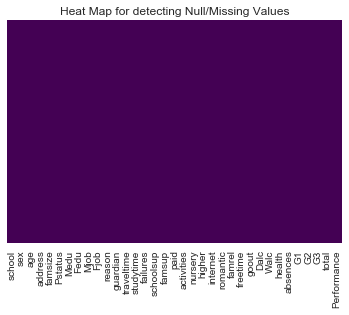

In [5]:
sns.heatmap(pdf.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title('Heat Map for detecting Null/Missing Values')
plt.savefig('new_port_null.jpg')

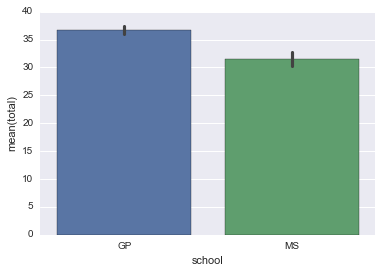

In [6]:
sns.barplot(x='school',y='total',data=pdf)
plt.savefig('new_port_school.jpg')

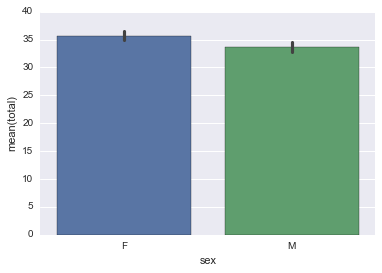

In [7]:
sns.barplot(x='sex',y='total',data=pdf)
plt.savefig('new_port_sex.jpg')

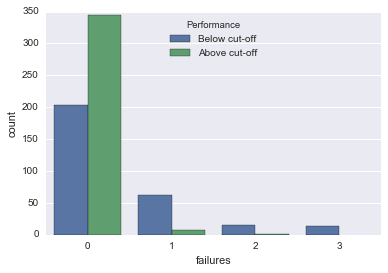

In [5]:
sns.countplot(x='failures',hue='Performance',data=pdf)
plt.savefig('new_port_perf_fail.jpg')

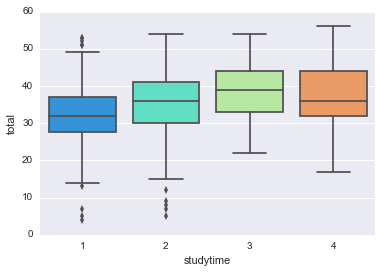

In [9]:
sns.boxplot(x="studytime", y="total", data=pdf,palette='rainbow')
plt.savefig('new_port_box_study.jpg')

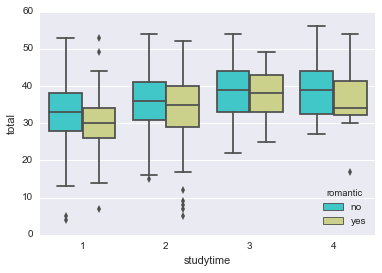

In [10]:
sns.boxplot(x="studytime", y="total", hue='romantic',data=pdf,palette='rainbow')
plt.savefig('new_port_romantic.jpg')

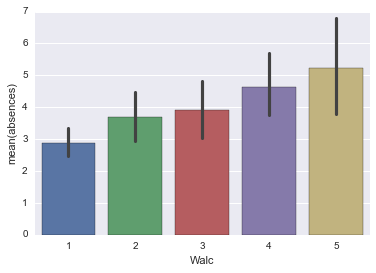

In [11]:
sns.barplot(x='Walc',y='absences',data=pdf)
plt.savefig('new_port_Absence.jpg')

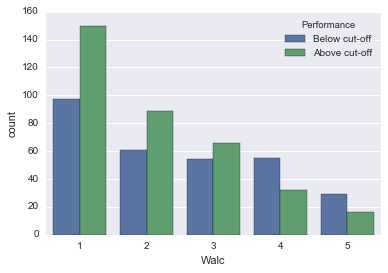

In [6]:
sns.countplot(x='Walc',hue='Performance',data=pdf)
plt.savefig('new_port_perf_walc.jpg')

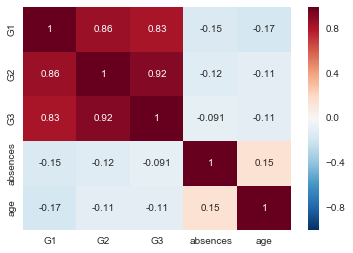

In [13]:
sns.heatmap(pdf[['G1','G2','G3','absences','age']].corr(),annot=True)
plt.savefig('new_port_correlation.jpg')

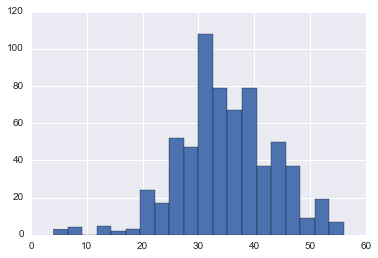

In [24]:
pdf['total'].hist(bins=20)
plt.savefig('new_port_total_hist.jpg')

In [7]:
#Dummy Variables for Categorical Variables
sch=pd.get_dummies(pdf['school'],drop_first=True,prefix='school')
address=pd.get_dummies(pdf['address'],drop_first=True,prefix='address')
fail=pd.get_dummies(pdf['failures'],drop_first=True,prefix='fail')
high=pd.get_dummies(pdf['higher'],drop_first=True,prefix='high')
ssp=pd.get_dummies(pdf['schoolsup'],drop_first=True,prefix='SSP')
guard=pd.get_dummies(pdf['guardian'],drop_first=True,prefix='Guard')
act=pd.get_dummies(pdf['activities'],drop_first=True,prefix='Activity')
fedu=pd.get_dummies(pdf['Fedu'],drop_first=True,prefix='Fedu')
medu=pd.get_dummies(pdf['Medu'],drop_first=True,prefix='Medu')
stdtime=pd.get_dummies(pdf['studytime'],drop_first=True,prefix='studytime')
GT3=pd.get_dummies(pdf['famsize'],drop_first=True,prefix='famsize')
Pstatus_apart=pd.get_dummies(pdf['Pstatus'],drop_first=True,prefix='Pstatus')
medu=pd.get_dummies(pdf['Medu'],drop_first=True,prefix='Medu')
Mjob=pd.get_dummies(pdf['Mjob'],drop_first=True,prefix='Mjob')
Fjob=pd.get_dummies(pdf['Fjob'],drop_first=True,prefix='Fjob')
reason=pd.get_dummies(pdf['reason'],drop_first=True,prefix='reason')
traveltime=pd.get_dummies(pdf['traveltime'],drop_first=True,prefix='traveltime')
famsup=pd.get_dummies(pdf['famsup'],drop_first=True,prefix='famsup')
paid=pd.get_dummies(pdf['paid'],drop_first=True,prefix='paid')
nurs=pd.get_dummies(pdf['nursery'],drop_first=True,prefix='nursery')
internet=pd.get_dummies(pdf['internet'],drop_first=True,prefix='internet')
romantic=pd.get_dummies(pdf['romantic'],drop_first=True,prefix='romantic')
famrel=pd.get_dummies(pdf['famrel'],drop_first=True,prefix='famrel')
freetime=pd.get_dummies(pdf['freetime'],drop_first=True,prefix='freetime')
goout=pd.get_dummies(pdf['goout'],drop_first=True,prefix='goout')
Dalc=pd.get_dummies(pdf['Dalc'],drop_first=True,prefix='Dalc')
Walc=pd.get_dummies(pdf['Walc'],drop_first=True,prefix='Walc')
sex=pd.get_dummies(pdf['sex'],drop_first=True,prefix='sex')
health=pd.get_dummies(pdf['health'],drop_first=True,prefix='health')




In [8]:
#SVM
from sklearn.cross_validation import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier

C:\Users\mcpea_000\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [9]:
#Complete Data
df_cont=pdf[['age','absences','Performance']]
df_complete=pd.concat([df_cont,sch,address,fail,high,ssp,guard,act,fedu,stdtime,GT3,Pstatus_apart,medu,Mjob,Fjob],axis=1)
df_complete=pd.concat([df_complete,reason,traveltime,famsup,paid,nurs,internet,romantic,famrel,freetime,goout,Dalc,Walc,health],axis=1)


In [10]:
#Logistic with feature selection - better results

df_log=pd.concat([sch,fail,high,ssp,sex,medu,Dalc,pdf['Performance']],axis=1)
X=df_log.drop(['Performance'],axis=1)
Y=df_log['Performance']
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=101)
lg=LogisticRegression(random_state=1001)
lg.fit(X_train,y_train)
predictions=lg.predict(X_test)
print(classification_report(y_test,predictions))

               precision    recall  f1-score   support

Above cut-off       0.75      0.76      0.75       109
Below cut-off       0.69      0.67      0.68        86

  avg / total       0.72      0.72      0.72       195



In [11]:

X_svm=df_complete.drop(['Performance'],axis=1)
Y_svm=df_complete['Performance']
X_train,X_test,y_train,y_test=train_test_split(X_svm,Y_svm,test_size=0.3,random_state=101)
svc_model=SVC()
svc_model.fit(X_train,y_train)
predictions=svc_model.predict(X_test)
print(classification_report(y_test,predictions))

               precision    recall  f1-score   support

Above cut-off       0.69      0.62      0.66       109
Below cut-off       0.58      0.65      0.61        86

  avg / total       0.64      0.64      0.64       195



In [14]:
C=[0.1,1, 10, 40,50,0.01,100]
gamma=[1,0.1,0.01,0.001]
for c in C:
    for gam in gamma:
        svc_model=SVC(C=c,gamma=gam,random_state=1001)
        svc_model.fit(X_train,y_train)
        pred=svc_model.predict(X_test)
        y_test=np.array(y_test)
        acc=np.sum((y_test==pred)& (y_test=='Below cut-off'))
        if(acc>58):
            print(c,gam)
            print(acc)

100 0.001
59


In [15]:
svc_model=SVC(C=100,gamma=.001)
svc_model.fit(X_train,y_train)
predictions=svc_model.predict(X_test)
print(classification_report(y_test,predictions))

               precision    recall  f1-score   support

Above cut-off       0.72      0.65      0.69       109
Below cut-off       0.61      0.69      0.64        86

  avg / total       0.67      0.67      0.67       195



In [16]:
#Random Forest

X=df_complete.drop(['Performance'],axis=1)
Y=df_complete['Performance']
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=101)
rfc=RandomForestClassifier(n_estimators=199,max_features=2)
rfc.fit(X_train,y_train)
predictions=rfc.predict(X_test)
print(classification_report(y_test,predictions))

               precision    recall  f1-score   support

Above cut-off       0.73      0.79      0.76       109
Below cut-off       0.70      0.63      0.66        86

  avg / total       0.72      0.72      0.72       195



In [22]:
#Optimizing Random FOrest
for n in range(60,80): 
    for i in range(6,13):
        rfc=RandomForestClassifier(n_estimators=n,max_features=i,random_state=1001)
        rfc.fit(X_train,y_train)
        pred=rfc.predict(X_test)
        y_test=np.array(y_test)
        acc=np.sum((y_test==pred)& (y_test=='Below cut-off'))
        if(acc>59):
            print(n,i)
            print(acc)
        
      

65 11
60


In [23]:
#Random Forest Best
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(n_estimators=65,max_features=11,random_state=1001)
rfc.fit(X_train,y_train)
pred=rfc.predict(X_test)
y_test=np.array(y_test)
print(classification_report(y_test, rfc.predict(X_test)))

               precision    recall  f1-score   support

Above cut-off       0.75      0.72      0.74       109
Below cut-off       0.67      0.70      0.68        86

  avg / total       0.71      0.71      0.71       195

